# Going through the different csvs to see what we're working with and how to deal with any Null values.
## All data found in .csv folder 'data'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

# -- GAMES

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           122 non-null    int64 
 1   season           122 non-null    int64 
 2   week             122 non-null    int64 
 3   gameDate         122 non-null    object
 4   gameTimeEastern  122 non-null    object
 5   homeTeamAbbr     122 non-null    object
 6   visitorTeamAbbr  122 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


### Data Summary: *Games doesn't need any cleaning, but also doesn't seem useful...*

----

# -- PLAYERS

In [4]:
players = pd.read_csv('data/players.csv')

In [5]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   object
 2   weight            1679 non-null   int64 
 3   birthDate         1447 non-null   object
 4   collegeName       1455 non-null   object
 5   officialPosition  1679 non-null   object
 6   displayName       1679 non-null   object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


#### Should change height to a continuous integer variable (inches):

In [6]:
players.height.value_counts()

6-3     255
6-4     231
6-2     197
6-1     192
6-5     183
6-0     161
5-11    135
6-6     110
5-10     89
5-9      48
6-7      36
5-8      19
6-8      16
5-6       3
6-9       2
5-7       2
Name: height, dtype: int64

In [7]:
players['height'] = players.height.str[0].astype(int) * 12 + players.height.str[2:].astype(int)

##### Age (based on birthday) and college might be useful features, however there are a lot of nulls.  Attempted to scrape Null values from NFL website but was timeouted/blocked.

#### Since we won't use birthday/age (too many missing values), drop them:

In [8]:
# convert our date column to datetime type
players.drop(columns = ['birthDate','collegeName'], inplace = True)

In [9]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   int64 
 2   weight            1679 non-null   int64 
 3   officialPosition  1679 non-null   object
 4   displayName       1679 non-null   object
dtypes: int64(3), object(2)
memory usage: 65.7+ KB


,nflId,height,weight,officialPosition,displayName
0,25511,76,225,QB,Tom Brady
1,28963,77,240,QB,Ben Roethlisberger
2,29550,76,328,T,Jason Peters
3,29851,74,225,QB,Aaron Rodgers
4,30078,74,228,QB,Ryan Fitzpatrick


### Data Summary: *Can use this to tie name to players and their height, weight, and official position.*

----

# -- PLAYS

In [10]:
plays = pd.read_csv('data/plays.csv')

In [11]:
plays.info()
plays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8558 non-null   int64  
 1   playId                  8558 non-null   int64  
 2   playDescription         8558 non-null   object 
 3   quarter                 8558 non-null   int64  
 4   down                    8558 non-null   int64  
 5   yardsToGo               8558 non-null   int64  
 6   possessionTeam          8558 non-null   object 
 7   defensiveTeam           8558 non-null   object 
 8   yardlineSide            8433 non-null   object 
 9   yardlineNumber          8558 non-null   int64  
 10  gameClock               8558 non-null   object 
 11  preSnapHomeScore        8558 non-null   int64  
 12  preSnapVisitorScore     8558 non-null   int64  
 13  passResult              8558 non-null   object 
 14  penaltyYards            756 non-null    

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,13:18,0,0,C,NaN,28,28,NaN,NaN,NaN,NaN,NaN,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,12:23,0,0,C,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,09:56,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,09:46,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


##### Need to examine (and summary of fixes):
- Penalties (foulName and foulNFLId)
    - Will fill Nulls in with zeros
- absoluteYardlineNumber (missing 1)
    - random miss - column to be dropped anyway
- yardlineSide (missing 125)
    - these are all 50 yard line, column to be dropped anyway after yards to score creation
- offenseFormation (missing 7)
    - miss these along with defenders in box, probably drop
- personnelO (Missing 1)
    - random miss, probably have to drop or fill in 
- defendersInBox (missing 7)
    - same as o formation, should drop
- personnelD (missing 1)
    - same random miss as personnelO above
- dropBackType (missing 528)
    - missed

#### First I was curious about fouls, in particular the single 3 penalty play:

In [12]:
plays[plays.foulName3.isnull() == False]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
2344,2021092600,2022,"(1:14) (No Huddle, Shotgun) T.Heinicke pass sh...",2,1,10,WAS,BUF,WAS,36,01:14,24,14,IN,5.0,0,0,Illegal Blindside Block,35470.0,Defensive Holding,46085.0,Illegal Contact,46190.0,74.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,0,Quarters,Zone


*After thinking about the rest of the penalties, probably best to zero NaNs out.  Should keep and not drop though to see when holdings were called, as well as pass interference that might have prevented an otherwise completed pass.*

#### Missing yardlineside (125 occurences):

In [13]:
plays[plays.yardlineSide.isnull()].yardlineNumber.value_counts()

50    125
Name: yardlineNumber, dtype: int64

Clearly these are when the ball is at the 50 yard line. Will drop this column (need to drop later since it is used for analysis below).

In [14]:
#plays.drop(columns = ['yardlineSide'], inplace = True)

#### Missing absoluteYardlineNumber:

Fixing the null

In [15]:
plays[plays.absoluteYardlineNumber.isnull()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
1570,2021091904,3676,(5:25) T.Bridgewater pass short right to A.Okw...,4,1,10,DEN,JAX,JAX,39,05:25,13,23,C,NaN,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Cover-1,Man


*Since it is on the 39 yardline side of the defense, the absoluteYardlineNumber will be 49.0.*

In [16]:
# This turns out to be unecessary, as this columns will be dropped for a new metric
#plays.at[1570,'absoluteYardlineNumber'] = 49.0

Some additional exploration of the feature:

In [17]:
#plays[plays.absoluteYardlineNumber.isnull()]
yL = pd.DataFrame(plays.absoluteYardlineNumber.value_counts())

In [18]:
plays.absoluteYardlineNumber.describe()

count    8557.000000
mean       59.248568
std        23.657404
min        11.000000
25%        40.000000
50%        59.000000
75%        79.000000
max       109.000000
Name: absoluteYardlineNumber, dtype: float64

In [19]:
yL.head()

,absoluteYardlineNumber
35.0,344
85.0,311
50.0,146
54.0,130
72.0,126


<AxesSubplot:ylabel='absoluteYardlineNumber'>

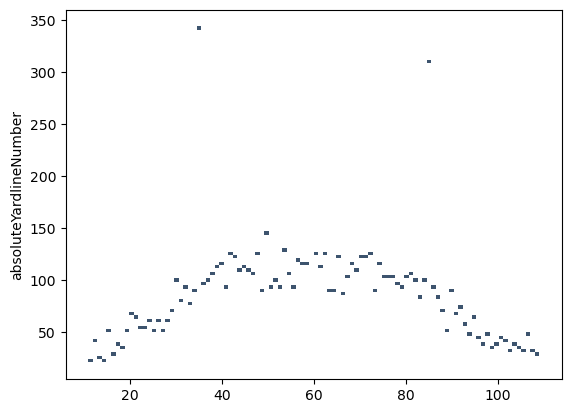

In [20]:
sns.histplot(x = yL.index, y = yL.absoluteYardlineNumber, bins = 100)

Is there a difference between the sides of the fields?

In [21]:
left = yL[yL.index <= 60]
right = yL[yL.index >= 60]
left.absoluteYardlineNumber.var(), right.absoluteYardlineNumber.var()

(2409.7616326530606, 2067.3877551020405)

In [22]:
t, p = stats.ttest_ind(left.absoluteYardlineNumber, right.absoluteYardlineNumber, equal_var=False)
t, p / 2

(0.553752240429903, 0.2905085315083535)

In [23]:
yL = [int(x) for x in yL.index]

In [24]:
for i in range(0,120):
    if i in yL:
        continue
    else:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
110
111
112
113
114
115
116
117
118
119


In [25]:
plays[plays.absoluteYardlineNumber == 85].head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
27,2021090900,1506,(8:16) (Shotgun) D.Prescott pass incomplete de...,2,1,10,DAL,TB,TB,25,08:16,14,7,I,5.0,0,5,Defensive Holding,47877.0,NaN,NaN,NaN,NaN,85.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 3 LB, 5 DB",NaN,1,Cover-3,Zone
30,2021090900,1687,(5:43) (Shotgun) D.Prescott pass incomplete de...,2,2,8,DAL,TB,TB,25,05:43,14,7,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
31,2021090900,1726,(5:37) (Shotgun) D.Prescott pass short middle ...,2,3,8,DAL,TB,TB,25,05:37,14,7,C,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,85.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-0,Man
69,2021090900,3462,(:33) (Shotgun) T.Brady pass short left to L.F...,3,1,10,TB,DAL,TB,25,00:33,28,26,C,NaN,10,10,NaN,NaN,NaN,NaN,NaN,NaN,85.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
164,2021091200,4240,(4:20) M.Ryan pass incomplete deep left to C.R...,4,1,10,ATL,PHI,ATL,25,04:20,6,29,I,19.0,0,19,Defensive Pass Interference,42441.0,NaN,NaN,NaN,NaN,85.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,1,Quarters,Zone


##### The absolute yard line is the distance from the goal line, to inlclude the opposite end zone.  Still, a funky feature since 35 and 85 both correspond to the 25 yeard line of the possession team.  A better metric to create is distance to goal, which I'll call 'yards_to_score'.

In [26]:
plays['yards_to_score'] = np.where(plays.possessionTeam == plays.yardlineSide, 100-plays.yardlineNumber,plays.yardlineNumber)

#### offenseFormation, personnelO, defendersInBox, personnelD are best to simply drop since they are such a small number - collectively 7 of the overall records:

In [27]:
plays[plays.personnelO.isnull()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,yards_to_score
1570,2021091904,3676,(5:25) T.Bridgewater pass short right to A.Okw...,4,1,10,DEN,JAX,JAX,39,05:25,13,23,C,NaN,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Cover-1,Man,39


In [28]:
plays[plays.offenseFormation.isnull()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,yards_to_score
916,2021091211,1517,"(:20) (No Huddle, Shotgun) Aa.Rodgers pass inc...",2,3,6,GB,NO,GB,43,00:20,17,0,I,5.0,0,5,Illegal Use of Hands,47888.0,NaN,NaN,NaN,NaN,53.0,NaN,"1 RB, 1 TE, 3 WR",NaN,"3 DL, 2 LB, 6 DB",NaN,0,2-Man,Man,57
1570,2021091904,3676,(5:25) T.Bridgewater pass short right to A.Okw...,4,1,10,DEN,JAX,JAX,39,05:25,13,23,C,NaN,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Cover-1,Man,39
1654,2021091906,639,(2:42) M.Jones pass incomplete deep middle to ...,1,2,5,NE,NYJ,NYJ,39,02:42,0,3,I,4.0,0,4,Defensive Offside,48247.0,NaN,NaN,NaN,NaN,49.0,NaN,"2 RB, 1 TE, 2 WR",NaN,"3 DL, 4 LB, 4 DB",NaN,1,Cover-1,Man,39
4887,2021101004,3207,(11:03) (Shotgun) T.Lawrence pass deep left in...,4,3,7,JAX,TEN,TEN,9,11:03,19,31,IN,4.0,0,0,Defensive Holding,53451.0,NaN,NaN,NaN,NaN,19.0,NaN,"1 RB, 1 TE, 3 WR",NaN,"2 DL, 3 LB, 6 DB",NaN,0,Cover-1,Man,9
6874,2021102402,2491,"(5:45) (No Huddle, Shotgun) T.Tagovailoa scram...",3,2,6,MIA,ATL,ATL,6,05:45,7,20,R,0.0,3,0,Offensive Holding,42924.0,Defensive Holding,46269.0,NaN,NaN,16.0,NaN,"1 RB, 2 TE, 2 WR",NaN,"2 DL, 4 LB, 5 DB",NaN,0,Bracket,Other,6
6899,2021102402,3689,(5:37) (Shotgun) T.Tagovailoa pass left to J.W...,4,1,14,MIA,ATL,ATL,44,05:37,21,27,C,-5.0,8,-5,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,"1 RB, 2 TE, 2 WR",NaN,"2 DL, 4 LB, 5 DB",NaN,1,Cover-3,Zone,44
7912,2021103105,1905,(:11) (Shotgun) D.Mills pass short right inten...,2,1,10,HOU,LA,LA,47,00:11,0,24,IN,5.0,0,0,Illegal Use of Hands,53532.0,NaN,NaN,NaN,NaN,57.0,NaN,"1 RB, 1 TE, 3 WR",NaN,"2 DL, 3 LB, 6 DB",NaN,0,Quarters,Zone,47


- Will drop these at end, after all other nulls filled

#### Examining the null dropback types:

In [29]:
plays[plays.dropBackType.isnull()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,yards_to_score
25,2021090900,1392,(9:09) (Shotgun) D.Prescott pass incomplete sh...,2,1,10,DAL,TB,DAL,47,09:09,14,7,I,14.0,0,14,Defensive Pass Interference,46132.0,NaN,NaN,NaN,NaN,57.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",NaN,0,Cover-1,Man,53
27,2021090900,1506,(8:16) (Shotgun) D.Prescott pass incomplete de...,2,1,10,DAL,TB,TB,25,08:16,14,7,I,5.0,0,5,Defensive Holding,47877.0,NaN,NaN,NaN,NaN,85.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 3 LB, 5 DB",NaN,1,Cover-3,Zone,25
38,2021090900,2129,(2:00) (Shotgun) D.Prescott pass short left to...,2,1,10,DAL,TB,DAL,36,02:00,21,16,C,26.0,8,11,Defensive Pass Interference,47877.0,Face Mask (15 Yards),47877.0,NaN,NaN,46.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,0,Quarters,Zone,64
44,2021090900,2298,"(:35) (No Huddle, Shotgun) D.Prescott scramble...",2,3,22,DAL,TB,TB,33,00:35,21,16,R,-10.0,4,-10,Offensive Holding,46119.0,NaN,NaN,NaN,NaN,77.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,0,Quarters,Zone,33
53,2021090900,2678,(12:10) (Shotgun) D.Prescott pass incomplete d...,3,2,10,DAL,TB,TB,34,12:10,21,16,I,16.0,0,16,Defensive Pass Interference,43757.0,NaN,NaN,NaN,NaN,76.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,0,Quarters,Zone,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,2021110100,2165,"(:25) (No Huddle, Shotgun) D.Jones pass incomp...",2,1,10,NYG,KC,NYG,37,00:25,14,10,I,8.0,0,8,Defensive Pass Interference,52546.0,NaN,NaN,NaN,NaN,47.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",NaN,0,Cover-1,Man,63
8520,2021110100,2226,(:21) (Shotgun) D.Jones scrambles right end pu...,2,1,15,NYG,KC,NYG,40,00:21,14,10,R,-10.0,2,-10,Offensive Holding,37090.0,NaN,NaN,NaN,NaN,50.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",NaN,0,Cover-2,Zone,60
8546,2021110100,3876,(5:48) (Shotgun) D.Jones pass incomplete deep ...,4,3,4,NYG,KC,NYG,34,05:48,17,17,I,5.0,0,5,Defensive Holding,46757.0,NaN,NaN,NaN,NaN,44.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 1 LB, 6 DB",NaN,0,Cover-1,Man,66
8549,2021110100,4016,(4:41) (Shotgun) P.Mahomes pass incomplete sho...,4,1,10,KC,NYG,KC,29,04:41,17,17,I,-10.0,0,-10,Offensive Holding,46152.0,NaN,NaN,NaN,NaN,81.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Cover-3,Zone,71


In [30]:
plays.dropBackType.value_counts()

TRADITIONAL               6542
SCRAMBLE                   899
DESIGNED_ROLLOUT_RIGHT     286
DESIGNED_ROLLOUT_LEFT      149
SCRAMBLE_ROLLOUT_RIGHT     125
SCRAMBLE_ROLLOUT_LEFT       23
DESIGNED_RUN                 5
UNKNOWN                      1
Name: dropBackType, dtype: int64

In [31]:
plays[plays.dropBackType == 'SCRAMBLE']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,yards_to_score
43,2021090900,2279,(1:11) (Shotgun) D.Prescott sacked at TB 33 fo...,2,2,10,DAL,TB,TB,21,01:11,21,16,S,NaN,-12,-12,NaN,NaN,NaN,NaN,NaN,NaN,89.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",SCRAMBLE,0,Quarters,Zone,21
45,2021090900,2330,(:28) (Shotgun) D.Prescott scrambles left end ...,2,3,32,DAL,TB,TB,43,00:28,21,16,R,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,67.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"3 DL, 3 LB, 5 DB",SCRAMBLE,0,Quarters,Zone,43
67,2021090900,3364,(2:03) (Shotgun) D.Prescott scrambles up the m...,3,1,10,DAL,TB,TB,27,02:03,28,19,R,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,83.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",SCRAMBLE,0,Cover-6,Zone,27
109,2021091200,843,"(2:51) (No Huddle, Shotgun) M.Ryan scrambles l...",1,3,9,ATL,PHI,PHI,32,02:51,3,7,R,NaN,8,8,NaN,NaN,NaN,NaN,NaN,NaN,78.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 2 LB, 5 DB",SCRAMBLE,0,Quarters,Zone,32
114,2021091200,1153,(14:43) (Shotgun) J.Hurts pass short right to ...,2,1,10,PHI,ATL,PHI,17,14:43,6,7,C,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,27.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",SCRAMBLE,1,Cover-3,Zone,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,2021110100,3471,(12:37) P.Mahomes scrambles right end ran ob a...,4,2,6,KC,NYG,NYG,48,12:37,14,17,R,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,58.0,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",SCRAMBLE,1,Quarters,Zone,48
8547,2021110100,3909,(5:42) D.Jones pass short middle to D.Booker t...,4,1,10,NYG,KC,NYG,39,05:42,17,17,C,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",SCRAMBLE,1,Cover-3,Zone,61
8548,2021110100,3955,(4:54) (Shotgun) D.Jones pass incomplete short...,4,3,7,NYG,KC,NYG,42,04:54,17,17,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE,0,Cover-1,Man,58
8553,2021110100,4310,(1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...,4,3,8,KC,NYG,NYG,8,01:56,17,17,S,NaN,-8,-8,NaN,NaN,NaN,NaN,NaN,NaN,18.0,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"1 DL, 3 LB, 7 DB",SCRAMBLE,0,Bracket,Other,8


* Should simply replace these dropbacks with 'Unknown'*

In [32]:
plays['dropBackType'] = plays.dropBackType.fillna('UNKNOWN')

In [33]:
plays.dropBackType.value_counts()

TRADITIONAL               6542
SCRAMBLE                   899
UNKNOWN                    529
DESIGNED_ROLLOUT_RIGHT     286
DESIGNED_ROLLOUT_LEFT      149
SCRAMBLE_ROLLOUT_RIGHT     125
SCRAMBLE_ROLLOUT_LEFT       23
DESIGNED_RUN                 5
Name: dropBackType, dtype: int64

#### Lastly, I think replacing Home and Visitor Scores with Offense and Defense Scores is a much better metric.  To do this will need to bring in game data (there we go, a use for it!)

In [34]:
plays = plays.merge(games[['gameId','homeTeamAbbr','visitorTeamAbbr']], on = 'gameId', how = 'left')

In [35]:
plays['o_score'] = np.where(plays.possessionTeam == plays.homeTeamAbbr,plays.preSnapHomeScore,plays.preSnapVisitorScore)
plays['d_score'] = np.where(plays.defensiveTeam == plays.homeTeamAbbr,plays.preSnapHomeScore,plays.preSnapVisitorScore)

In [36]:
plays.sample(5)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,yards_to_score,homeTeamAbbr,visitorTeamAbbr,o_score,d_score
2686,2021092605,1648,(2:56) (Shotgun) M.Jones pass short middle int...,2,3,10,NE,NO,NE,44,02:56,0,7,IN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 2 LB, 6 DB",TRADITIONAL,0,Cover-1,Man,56,NE,NO,0,7
8087,2021103107,3039,(:36) (Shotgun) M.White pass short middle to E...,3,1,10,NYJ,CIN,CIN,46,00:36,17,24,C,NaN,24,24,NaN,NaN,NaN,NaN,NaN,NaN,64.0,SHOTGUN,"1 RB, 0 TE, 4 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-6,Zone,46,NYJ,CIN,17,24
5579,2021101100,3220,"(10:08) (No Huddle, Shotgun) L.Jackson pass sh...",4,1,10,BAL,IND,IND,20,10:08,9,25,C,NaN,15,15,NaN,NaN,NaN,NaN,NaN,NaN,90.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-2,Zone,20,BAL,IND,9,25
2442,2021092601,3469,(10:11) (Shotgun) J.Fields pass incomplete sho...,4,2,9,CHI,CLE,CHI,26,10:11,23,6,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Quarters,Zone,74,CLE,CHI,6,23
1362,2021091901,2443,(6:36) J.Fields pass incomplete deep left to D...,3,1,10,CHI,CIN,CHI,47,06:36,7,3,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,57.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,1,Cover-1,Man,53,CHI,CIN,7,3


### Fills, drops, retypes and renames:

1. Fill in penalties/fouls with zeros:

In [37]:
plays = plays.fillna(value = {'penaltyYards':0,
                              'foulName1':0,
                              'foulNFLId1':0,
                              'foulName2':0,
                              'foulNFLId2':0,
                              'foulName3':0,
                              'foulNFLId3':0})

2. Drop unnecessary columns:

In [38]:
plays = plays.drop(columns = ['yardlineSide',
                              'yardlineNumber',
                              'preSnapHomeScore',
                              'preSnapVisitorScore',
                              'absoluteYardlineNumber',
                              'homeTeamAbbr',
                              'visitorTeamAbbr'])

3. Seven rows with nulls in offenseFormation, personnelO, defendersInBox, personnelD

In [39]:
plays = plays.dropna()

4. Rename:

In [40]:
plays = plays.rename(columns = {'gameId':'game',
                             'playId':'play',
                             'playDescription':'play_description',
                             'yardsToGo':'yds_togo',
                             'possessionTeam':'offense',
                             'defensiveTeam':'defense',
                             'gameClock':'clock',
                             'passResult':'pass_result',
                             'penaltyYards':'penalty_yards',
                             'prePenaltyPlayResult':'play_outcome',
                             'playResult':'play_result',
                             'foulName1':'penalty1',
                             'foulNFLId1':'penalized1',
                             'foulName2':'penalty2',
                             'foulNFLId2':'penalized2',
                             'foulName3':'penalty3',
                             'foulNFLId3':'penalized3',
                             'offenseFormation':'o_formation',
                             'personnelO':'o_personnel',
                             'defendersInBox':'d_in_box',
                             'personnelD':'d_personnel',
                             'dropBackType':'drop_back',
                             'pff_playAction':'play_action',
                             'pff_passCoverage':'coverage',
                             'pff_passCoverageType':'man/zone'})

5. Retypes

Change clock to seconds remaining in quarter

In [41]:
plays['clock'] = plays.clock.str[:2].astype(int) * 60 + plays.clock.str[3:].astype(int)

Now change floats to ints:

In [42]:
retypes = plays.astype({'penalty_yards':int,
                       'penalized1':int,
                       'penalized2':int,
                       'penalized3':int,
                       'd_in_box':int})

### Data Summary: *Plays is rich with personnel setup and play data outcome that can be tied to the detailed frame-by-frame weekly play data.*

----

# -- SCOUT DATA

In [43]:
scout_data = pd.read_csv('data/pffScoutingData.csv')

In [44]:
scout_data.info()
scout_data.head(23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
5,2021090900,97,41233,Pass Route,RWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021090900,97,41263,Pass Rush,LEO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0
8,2021090900,97,42403,Pass Rush,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0


##### - Looks like every play (passing play) has all 22 positions covered.  Need to examine:
- pff_hit (_hurry, _sack)
    - only for defense, so should be 1/2 total
- The discrepency between block type and backfield block (see below)

In [45]:
import re
scout_data[(scout_data.pff_positionLinedUp == 'TE-L') | (scout_data.pff_positionLinedUp == 'TE-R')]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2021090900,349,46206,Pass Route,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,41915.0,CH,0.0
111,2021090900,410,35481,Pass Route,TE-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2021090900,434,35481,Pass Route,TE-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,2021090900,456,35481,Pass Route,TE-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187696,2021110100,3089,47959,Pass Block,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,52585.0,PA,0.0
187836,2021110100,3471,40011,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187991,2021110100,3876,37118,Pass Block,TE-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,40051.0,PP,0.0
188078,2021110100,4049,40011,Pass Block,TE-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,52591.0,PR,0.0


Interesting thing to note - TE blocking vs routes.

#### For each play, also need to determine if there were any unbolcked players that caused a hurry.  This seems to account for the discrepency between the number of defensive players having almost twice as many numbers (also, more people are rushing vs blocking).

In [46]:
scout_data[scout_data.pff_blockType.isnull() == False][scout_data.pff_backFieldBlock.isnull()]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/3579662219.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_data[scout_data.pff_blockType.isnull() == False][scout_data.pff_backFieldBlock.isnull()]


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
71367,2021092612,3508,54006,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,39959.0,PP,NaN


Imma say this one is a 0.0, and we can replace it safely.

In [47]:
scout_data.at[71367,'pff_backFieldBlock'] = 0.0

In [48]:
scout_data.iloc[71367]

gameId                    2021092612
playId                          3508
nflId                          54006
pff_role                  Pass Block
pff_positionLinedUp               RT
pff_hit                          NaN
pff_hurry                        NaN
pff_sack                         NaN
pff_beatenByDefender             0.0
pff_hitAllowed                   0.0
pff_hurryAllowed                 0.0
pff_sackAllowed                  0.0
pff_nflIdBlockedPlayer       39959.0
pff_blockType                     PP
pff_backFieldBlock               0.0
Name: 71367, dtype: object

In [49]:
scout_data[scout_data.pff_beatenByDefender == 1.0]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
224,2021090900,559,42377,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42403.0,PP,0.0
226,2021090900,559,42404,Pass Block,LG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,53504.0,PP,0.0
282,2021090900,687,47873,Pass Block,RG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,46081.0,PP,0.0
336,2021090900,788,42654,Pass Block,RT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,53461.0,PP,0.0
571,2021090900,1392,52554,Pass Block,C,NaN,NaN,NaN,1.0,0.0,0.0,0.0,40074.0,PP,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186515,2021103112,4167,52938,Pass Block,RT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,52525.0,PP,0.0
186946,2021110100,917,46103,Pass Block,RG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,43326.0,PP,0.0
186996,2021110100,1083,52507,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,52792.0,PA,0.0
187062,2021110100,1267,52507,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42406.0,PP,0.0


Creating catch-all features for 'block_fail" (blocker) or 'pass_rush_success' (defender):

In [50]:
# Offensive block fail
scout_data['block_fail'] = scout_data.pff_beatenByDefender + scout_data.pff_hitAllowed + scout_data.pff_hurryAllowed + scout_data.pff_sackAllowed

# Defender beat the block
scout_data['pass_rush_success'] = scout_data.pff_hit + scout_data.pff_hurry + scout_data.pff_sack

# !-Advanced: Could also get if they beat the block by looking at when their nflId appears on a blockers pff_beatenByDefender

In [51]:
scout_data[scout_data.block_fail > 0].head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0,1.0,NaN
16,2021090900,97,46163,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,SW,0.0,1.0,NaN
18,2021090900,97,52421,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,PP,0.0,1.0,NaN
95,2021090900,349,43293,Pass Block,HB-L,NaN,NaN,NaN,0.0,1.0,0.0,0.0,38588.0,PU,1.0,1.0,NaN
224,2021090900,559,42377,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42403.0,PP,0.0,1.0,NaN


In [52]:
scout_data[scout_data.pass_rush_success > 0].head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
6,2021090900,97,41263,Pass Rush,LEO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2021090900,97,42403,Pass Rush,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20,2021090900,97,53441,Pass Rush,LILB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
21,2021090900,97,53504,Pass Rush,RE,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
91,2021090900,349,38588,Pass Rush,LILB,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [53]:
scout_data.pff_role.value_counts()

Coverage      57765
Pass Block    46057
Pass Route    39513
Pass Rush     36362
Pass           8557
Name: pff_role, dtype: int64

In [54]:
# Do the above equal out?
57765 + 36362 == 46057 + 39513 + 8557

True

In [55]:
scout_data[scout_data.pff_role == 'Coverage'][scout_data.pass_rush_success == 1]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/3060174118.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_data[scout_data.pff_role == 'Coverage'][scout_data.pass_rush_success == 1]


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
6792,2021091202,3490,48364,Coverage,RILB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
11246,2021091205,1404,42470,Coverage,RILB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13254,2021091206,2210,45287,Coverage,LLB,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14227,2021091207,1090,46110,Coverage,SCBL,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15437,2021091208,225,47956,Coverage,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176215,2021103106,3492,47971,Coverage,RCB,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
182068,2021103110,986,52624,Coverage,LOLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
186751,2021110100,393,52591,Coverage,LILB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
186795,2021110100,531,52591,Coverage,LILB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


These indicate success only, but not sure how to count the times they rushed when not in coverage - could figure it out based on their x,y coodinates in weekly.  A lot of work unless deemed necessary.

In [56]:
scout_data[scout_data.pff_role == 'Pass'][scout_data.block_fail == 1]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/2422576662.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_data[scout_data.pff_role == 'Pass'][scout_data.block_fail == 1]


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success


In [57]:
scout_data[scout_data.pff_role == 'Pass Route'][scout_data.block_fail == 1]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/2433452983.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_data[scout_data.pff_role == 'Pass Route'][scout_data.block_fail == 1]


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
26900,2021091600,2873,52474,Pass Route,HB-R,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53479.0,CH,1.0,1.0,NaN
27144,2021091600,3440,52474,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,1.0,0.0,52663.0,BH,1.0,1.0,NaN
34635,2021091905,247,44857,Pass Route,TE-iL,NaN,NaN,NaN,0.0,0.0,1.0,0.0,37841.0,PA,0.0,1.0,NaN
47611,2021091913,2775,40129,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,1.0,46521.0,BH,1.0,1.0,NaN
49017,2021092000,3203,30842,Pass Route,TE-L,NaN,NaN,NaN,1.0,0.0,0.0,0.0,44834.0,PA,0.0,1.0,NaN
63522,2021092608,98,44975,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,1.0,53450.0,CH,1.0,1.0,NaN
69082,2021092611,2057,39985,Pass Route,HB-R,NaN,NaN,NaN,0.0,0.0,1.0,0.0,47844.0,PP,0.0,1.0,NaN
117207,2021101011,1039,46331,Pass Route,TE-oR,NaN,NaN,NaN,0.0,0.0,1.0,0.0,38551.0,SR,0.0,1.0,NaN
134025,2021101705,3631,40138,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,1.0,0.0,46133.0,BH,1.0,1.0,NaN
134315,2021101706,712,43425,Pass Route,HB-R,NaN,NaN,NaN,0.0,1.0,0.0,0.0,47844.0,PU,1.0,1.0,NaN


These folks who run pass routes but also are involved in blocking are likely chip blockers, or folks who block and then release (mostly running backs and tight ends).  The above only indicates fails, but it looks like we can use all of those who have an entry in player blocked to get both fails and non-fails:

In [58]:
scout_data[scout_data.pff_role == 'Pass Route'][scout_data.pff_nflIdBlockedPlayer.notnull() == True]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/1298075891.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_data[scout_data.pff_role == 'Pass Route'][scout_data.pff_nflIdBlockedPlayer.notnull() == True]


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
101,2021090900,349,46206,Pass Route,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,41915.0,CH,0.0,0.0,NaN
186,2021090900,480,44816,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,46185.0,CH,1.0,0.0,NaN
316,2021090900,764,45532,Pass Route,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,53461.0,SR,0.0,0.0,NaN
367,2021090900,869,46107,Pass Route,HB,NaN,NaN,NaN,0.0,0.0,0.0,0.0,46185.0,BH,1.0,0.0,NaN
507,2021090900,1312,35481,Pass Route,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44892.0,SR,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188017,2021110100,3909,43425,Pass Route,HB,NaN,NaN,NaN,0.0,0.0,0.0,0.0,40051.0,CH,1.0,0.0,NaN
188110,2021110100,4071,46526,Pass Route,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,52591.0,CH,1.0,0.0,NaN
188174,2021110100,4363,44835,Pass Route,LWR,NaN,NaN,NaN,0.0,0.0,0.0,0.0,52585.0,CH,0.0,0.0,NaN
188238,2021110100,4433,43425,Pass Route,HB-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,43326.0,CH,1.0,0.0,NaN


##### That is a lot of records, so we will have to account for them.

In [59]:
scout_data[scout_data.pff_role == 'Pass Block'].shape

(46057, 17)

In [60]:
scout_data[scout_data.pff_nflIdBlockedPlayer.notnull() == True].pff_role.value_counts()

Pass Block    44526
Pass Route     2000
Name: pff_role, dtype: int64

In [61]:
scout_data[(scout_data.pff_role == 'Pass Block') | (scout_data.pff_nflIdBlockedPlayer.notnull() == True)]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0,0.0,NaN
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0,1.0,NaN
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0,0.0,NaN
16,2021090900,97,46163,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,SW,0.0,1.0,NaN
18,2021090900,97,52421,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,PP,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188239,2021110100,4433,43695,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43338.0,SW,0.0,1.0,NaN
188240,2021110100,4433,44835,Pass Route,SLiWR,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42406.0,CH,0.0,0.0,NaN
188241,2021110100,4433,46090,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NB,0.0,0.0,NaN
188242,2021110100,4433,46103,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,43326.0,PP,0.0,0.0,NaN


In [62]:
scout_data.shape

(188254, 17)

48057 = 46057 + 2000, so the above accounts for all of those who attempt a block.

In [63]:
scout_data[scout_data.pff_role == 'Pass Block'].pff_positionLinedUp.value_counts()

C        8557
LG       8557
RG       8557
LT       8556
RT       8555
HB-L      595
HB-R      570
TE-R      479
HB        400
TE-L      334
TE-iR     219
TE-oR     150
TE-iL     120
TE-oL      66
SRWR       56
FB-R       55
SRiWR      49
FB         44
SLWR       33
FB-L       30
LWR        25
SLiWR      24
RWR        23
SRoWR       2
SLoWR       1
Name: pff_positionLinedUp, dtype: int64

#### Now we can break the scouting reports down by blockers vs pass_rushers.

First pass rushers, since it is easier:

In [64]:
scout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

In [65]:
scout_pass_rush = scout_data[scout_data.pff_role == 'Pass Rush']

In [66]:
scout_pass_rush = scout_pass_rush[['gameId',
                                    'playId',
                                    'nflId',
                                    'pff_positionLinedUp',
                                    'pff_hit',
                                    'pff_hurry',
                                    'pff_sack',]].rename(columns = {'gameId':'game',
                                                                    'playId':'play',
                                                                    'pff_positionLinedUp':'position',
                                                                    'pff_hit':'hit',
                                                                    'pff_hurry':'hurry',
                                                                    'pff_sack':'sack'}).astype({'hit':int,
                                                                                                'hurry':int,
                                                                                                'sack':int})

In [67]:
scout_pass_rush['pressure'] = scout_pass_rush.hit + scout_pass_rush.hurry + scout_pass_rush.sack

In [68]:
scout_pass_rush

,game,play,nflId,position,hit,hurry,sack,pressure
6,2021090900,97,41263,LEO,0,1,0,1
8,2021090900,97,42403,ROLB,0,1,0,1
14,2021090900,97,44955,DRT,0,0,0,0
20,2021090900,97,53441,LILB,0,1,0,1
21,2021090900,97,53504,RE,0,1,0,1
...,...,...,...,...,...,...,...,...
188230,2021110100,4411,52585,REO,0,0,0,0
188235,2021110100,4433,42406,ROLB,0,0,1,1
188236,2021110100,4433,43326,LE,0,0,0,0
188237,2021110100,4433,43338,RE,0,1,0,1


#### Now pass_blockers, which requires a bit more work

In [69]:
scout_pass_block = scout_data[(scout_data.pff_role == 'Pass Block') | (scout_data.pff_nflIdBlockedPlayer.notnull() == True)]

In [70]:
scout_pass_block.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48057 entries, 4 to 188249
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  48057 non-null  int64  
 1   playId                  48057 non-null  int64  
 2   nflId                   48057 non-null  int64  
 3   pff_role                48057 non-null  object 
 4   pff_positionLinedUp     48057 non-null  object 
 5   pff_hit                 0 non-null      float64
 6   pff_hurry               0 non-null      float64
 7   pff_sack                0 non-null      float64
 8   pff_beatenByDefender    48057 non-null  float64
 9   pff_hitAllowed          48057 non-null  float64
 10  pff_hurryAllowed        48057 non-null  float64
 11  pff_sackAllowed         48057 non-null  float64
 12  pff_nflIdBlockedPlayer  46526 non-null  float64
 13  pff_blockType           47874 non-null  object 
 14  pff_backFieldBlock      47874 non-nul

Looking at blocked players, can fill nulls with zero (did not block anybody)

In [71]:
scout_pass_block.pff_nflIdBlockedPlayer.value_counts()

47802.0    439
41239.0    404
43316.0    383
42349.0    357
46082.0    352
          ... 
48482.0      1
47877.0      1
38868.0      1
38718.0      1
53315.0      1
Name: pff_nflIdBlockedPlayer, Length: 665, dtype: int64

Block type nulls:

In [72]:
scout_pass_block.pff_blockType.value_counts()

PP    24697
PA     6331
PT     5906
SW     3025
CL     2595
CH     1565
NB     1332
PU      886
SR      492
BH      443
UP      307
PR      295
Name: pff_blockType, dtype: int64

In [73]:
scout_pass_block[scout_pass_block.pff_blockType.isnull() == True].pff_positionLinedUp.value_counts()

HB       61
HB-L     33
HB-R     28
C         7
FB        6
TE-oL     5
TE-oR     5
RG        5
TE-R      4
FB-R      4
TE-iL     3
FB-L      3
TE-L      3
TE-iR     3
SRWR      2
LG        2
SRiWR     2
LT        2
SLWR      2
LWR       1
RT        1
RWR       1
Name: pff_positionLinedUp, dtype: int64

Might replace these with a new category - unknown (UK).  Let's see how they compare to missing backfield blocks.

In [74]:
scout_pass_block[scout_pass_block.pff_backFieldBlock.isnull() == True]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
305,2021090900,735,52425,Pass Block,SRiWR,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2250,2021091200,303,42469,Pass Block,HB,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2444,2021091200,966,37234,Pass Block,TE-iL,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2449,2021091200,966,41808,Pass Block,FB-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4175,2021091201,1148,47857,Pass Block,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172852,2021103104,2033,53946,Pass Block,TE-oR,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
173744,2021103105,965,46100,Pass Block,HB,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
173895,2021103105,1366,43399,Pass Block,TE-R,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
181788,2021103110,252,42358,Pass Block,HB,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN


##### It appears that the nulls for these mean they simply did not block anyone.  Will replace blocktype with NB, and blocked player and backfield block with 0.

In [75]:
scout_pass_block = scout_pass_block.fillna(value = {'pff_nflIdBlockedPlayer':0,
                                                    'pff_blockType':'NB',
                                                    'pff_backFieldBlock':0})

In [76]:
scout_pass_block = scout_pass_block[['gameId',
                                    'playId',
                                    'nflId',
                                    'pff_positionLinedUp',
                                    'pff_nflIdBlockedPlayer',
                                    'pff_blockType',
                                    'pff_backFieldBlock',
                                    'pff_beatenByDefender',
                                    'pff_hitAllowed',
                                    'pff_hurryAllowed',
                                    'pff_sackAllowed']].rename(columns = {'gameId':'game',
                                                                    'playId':'play',
                                                                    'pff_positionLinedUp':'position',
                                                                    'pff_beatenByDefender':'beaten_by_pass_rusher',
                                                                    'pff_hitAllowed':'hit_allowed',
                                                                    'pff_hurryAllowed':'hurry_allowed',
                                                                    'pff_sackAllowed':'sack_allowed',
                                                                    'pff_nflIdBlockedPlayer':'rusher_blocked',
                                                                    'pff_blockType':'block_type',
                                                                    'pff_backFieldBlock':'backfield_block'}).astype({'beaten_by_pass_rusher':int,
                                                                                                                     'hit_allowed':int,
                                                                                                                     'hurry_allowed':int,
                                                                                                                     'sack_allowed':int,
                                                                                                                     'rusher_blocked':int,
                                                                                                                     'backfield_block':int})

Bring back block fail 

In [77]:
scout_pass_block['block_fail'] = scout_pass_block.beaten_by_pass_rusher + scout_pass_block.hit_allowed + scout_pass_block.hurry_allowed + scout_pass_block.sack_allowed

In [78]:
scout_pass_block

,game,play,nflId,position,rusher_blocked,block_type,backfield_block,beaten_by_pass_rusher,hit_allowed,hurry_allowed,sack_allowed,block_fail
4,2021090900,97,40151,C,44955,SW,0,0,0,0,0,0
7,2021090900,97,42377,LT,42403,PP,0,0,0,1,0,1
9,2021090900,97,42404,LG,44955,PP,0,0,0,0,0,0
16,2021090900,97,46163,RG,53441,SW,0,0,0,1,0,1
18,2021090900,97,52421,RT,53441,PP,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188239,2021110100,4433,43695,LG,43338,SW,0,0,0,0,1,1
188240,2021110100,4433,44835,SLiWR,42406,CH,0,0,0,0,0,0
188241,2021110100,4433,46090,C,0,NB,0,0,0,0,0,0
188242,2021110100,4433,46103,RG,43326,PP,0,0,0,0,0,0


In [79]:
scout_pass_block[scout_pass_block.block_type == 'NB'][scout_pass_block.block_fail == 1]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/1800117506.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scout_pass_block[scout_pass_block.block_type == 'NB'][scout_pass_block.block_fail == 1]


,game,play,nflId,position,rusher_blocked,block_type,backfield_block,beaten_by_pass_rusher,hit_allowed,hurry_allowed,sack_allowed,block_fail
2287,2021091200,348,53497,LG,0,NB,0,0,0,1,0,1
9943,2021091204,3255,53623,HB,0,NB,1,0,0,0,1,1
10556,2021091204,4401,52708,HB,0,NB,0,0,0,1,0,1
11643,2021091205,2388,42429,HB-L,0,NB,1,0,0,1,0,1
15786,2021091208,1190,45573,HB,0,NB,1,0,1,0,0,1
29260,2021091901,533,38553,RT,0,NB,0,1,0,0,0,1
38476,2021091907,2594,53466,RG,0,NB,0,0,1,0,0,1
41173,2021091909,2895,44853,HB,0,NB,1,1,0,0,0,1
42950,2021091910,2683,42469,HB-L,0,NB,0,0,0,1,0,1
47013,2021091913,952,53655,RG,0,NB,0,1,0,0,0,1


----

# -- WEEKLY

In [80]:
w1 = pd.read_csv('data/week1.csv')

In [81]:
w1.info()
w1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1118122 non-null  int64  
 1   playId         1118122 non-null  int64  
 2   nflId          1069508 non-null  float64
 3   frameId        1118122 non-null  int64  
 4   time           1118122 non-null  object 
 5   jerseyNumber   1069508 non-null  float64
 6   team           1118122 non-null  object 
 7   playDirection  1118122 non-null  object 
 8   x              1118122 non-null  float64
 9   y              1118122 non-null  float64
 10  s              1118122 non-null  float64
 11  a              1118122 non-null  float64
 12  dis            1118122 non-null  float64
 13  o              1069508 non-null  float64
 14  dir            1069508 non-null  float64
 15  event          1118122 non-null  object 
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


1. This has some pretty amazing player tracking data.  Each frame is equal to 1/10th of a second.
2. This is also complete, as the only Nulls are related to the football.

In [82]:
w1[w1.jerseyNumber.isnull() == True].head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
946,2021090900,97,NaN,1,2021-09-10T00:26:31.100,NaN,football,right,42.92,24.04,0.00,0.00,0.00,NaN,NaN,None
947,2021090900,97,NaN,2,2021-09-10T00:26:31.200,NaN,football,right,42.23,23.91,0.25,0.12,0.70,NaN,NaN,None
948,2021090900,97,NaN,3,2021-09-10T00:26:31.300,NaN,football,right,42.17,23.89,0.19,0.73,0.07,NaN,NaN,None
949,2021090900,97,NaN,4,2021-09-10T00:26:31.400,NaN,football,right,42.10,23.89,0.04,1.86,0.07,NaN,NaN,None
950,2021090900,97,NaN,5,2021-09-10T00:26:31.500,NaN,football,right,41.82,23.91,1.19,6.28,0.28,NaN,NaN,None


Replace the nflId and jerseyNumber of football with 0

In [83]:
# for use later:
week_time = w1.time

In [84]:
w1 = w1.drop(columns = ['time','playDirection','team','jerseyNumber']).rename(columns = {'gameId':'game',
                                                                        'playId':'play',
                                                                        'frameId':'frame',}).fillna(0).astype({'nflId':int})

In [85]:
tb1w1 = w1[w1.game == 2021090900][w1.play == 97][w1.nflId == 25511]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/1164631184.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tb1w1 = w1[w1.game == 2021090900][w1.play == 97][w1.nflId == 25511]


<AxesSubplot:xlabel='x', ylabel='y'>

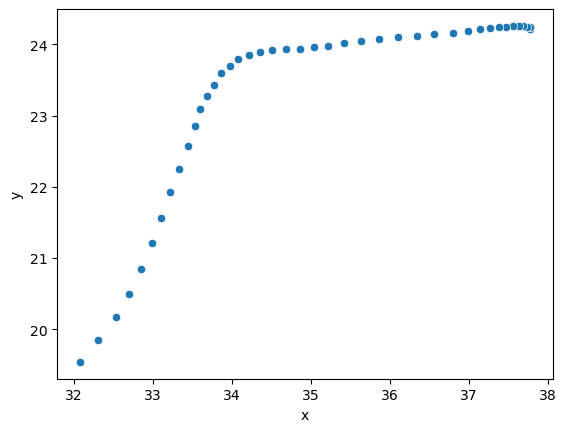

In [86]:
sns.scatterplot(data=tb1w1, x = 'x', y='y')

Above is the dropback pattern of the quarterback.

# ----------------------------------------------------------------------------------------

# Below is a less organized exploration of the the data, with small amounts of EDA to guide future analysis.

## With some of the cleaning done above after the below was performed, many cells do not work.

## Let's dive more into the weekly and see what each datapoint means

In [87]:
w1['time'] = week_time

In [88]:
w1_play1 = w1[w1.game == 2021090900][w1.play == 97]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/2301910177.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  w1_play1 = w1[w1.game == 2021090900][w1.play == 97]


In [89]:
w1_play1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 988
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   game    989 non-null    int64  
 1   play    989 non-null    int64  
 2   nflId   989 non-null    int64  
 3   frame   989 non-null    int64  
 4   x       989 non-null    float64
 5   y       989 non-null    float64
 6   s       989 non-null    float64
 7   a       989 non-null    float64
 8   dis     989 non-null    float64
 9   o       989 non-null    float64
 10  dir     989 non-null    float64
 11  event   989 non-null    object 
 12  time    989 non-null    object 
dtypes: float64(7), int64(4), object(2)
memory usage: 108.2+ KB


In [90]:
989/23

43.0

In [91]:
946/22

43.0

43 datapoints per player, assuming the ball has 43 as well:

In [92]:
946+43

989

In [93]:
a, b = w1_play1['time'].max()[-6:-4], w1_play1['time'].min()[-4:-2]
a, b

('35', '.1')

In [94]:
int(a) + float(b)

35.1

In [95]:
# def play_seconds(play_start, play_end):
#     #Pull out the mins, seconds, and milliseconds
#     start_min, end_min = int(play_start[-9:-7]) * 600, int(play_end[-9:-7]) * 600
#     start_sec, end_sec = int(play_start[-6:-4]) * 10, int(play_end[-6:-4]) * 10
#     start_msec, end_msec = int(play_start[-3]), int(play_end[-3])
#     return .1 + ((end_min + end_sec + end_msec) - (start_min + start_sec + start_msec))/10

def play_seconds(playId, gameId):
    return playId / 230

# Or can run an np.apply within a groupby function that groups plays together by gameId and 
    
    

In [96]:
#play_seconds(w1_play1['time'].min(),w1_play1['time'].max())

In [98]:
w1.play.value_counts()

2063    4991
3406    4968
2129    4669
1938    3312
620     3289
        ... 
2203     575
3610     575
2426     506
1744     483
3606     483
Name: play, Length: 1021, dtype: int64

In [99]:
w1_play_a = w1[w1.play == 3406][w1.game == 2021090900]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_72239/1861211383.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  w1_play_a = w1[w1.play == 3406][w1.game == 2021090900]


In [101]:
w1_play_a[w1_play_a.nflId == 0].game.value_counts()

2021090900    177
Name: game, dtype: int64

In [102]:
w1_play_a

,game,play,nflId,frame,x,y,s,a,dis,o,dir,event,time
64515,2021090900,3406,35441,1,90.61,28.14,0.05,0.04,0.01,285.95,37.17,None,2021-09-10T02:55:15.900
64516,2021090900,3406,35441,2,90.61,28.14,0.04,0.04,0.00,285.95,36.93,None,2021-09-10T02:55:16.000
64517,2021090900,3406,35441,3,90.61,28.15,0.04,0.04,0.01,285.95,34.10,None,2021-09-10T02:55:16.100
64518,2021090900,3406,35441,4,90.61,28.15,0.03,0.04,0.00,285.95,35.34,None,2021-09-10T02:55:16.200
64519,2021090900,3406,35441,5,90.61,28.14,0.03,0.03,0.01,285.95,39.06,None,2021-09-10T02:55:16.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68581,2021090900,3406,0,173,80.42,29.07,1.47,1.30,0.14,0.00,0.00,pass_forward,2021-09-10T02:55:33.100
68582,2021090900,3406,0,174,83.80,26.87,21.35,0.64,4.03,0.00,0.00,None,2021-09-10T02:55:33.200
68583,2021090900,3406,0,175,85.59,25.68,21.28,1.13,2.15,0.00,0.00,None,2021-09-10T02:55:33.300
68584,2021090900,3406,0,176,87.36,24.49,21.22,1.52,2.13,0.00,0.00,None,2021-09-10T02:55:33.400


In [103]:
len(w1_play_a)/230

17.7

In [104]:
4071/230 

17.7

In [ ]:
#play_seconds(w1_play_a['time'].min(),w1_play_a['time'].max())

In [105]:
4968/23

216.0

In [106]:
w1_play_a['time'].min(),w1_play_a['time'].max()

('2021-09-10T02:55:15.900', '2021-09-10T02:55:33.500')

##### Each data point is 1/10th of a second for every player and the ball during a play

## Base Analysis - Linemen Blocking

##### I will examine all linemen plays using the Scouting report.  To keep things simple we will use only PP plays and remove the single pass route example.
- Next, go back and isolate the QB for straight dropbacks to control for that.

In [108]:
scout_data.pff_positionLinedUp.value_counts()

QB       8557
RG       8557
C        8557
LT       8557
LG       8557
RT       8555
RCB      8224
LCB      8159
LWR      8134
RWR      8033
ROLB     5325
LOLB     5070
DRT      4812
LEO      4659
DLT      4371
REO      4287
LLB      4202
FSL      3793
FSR      3764
RLB      3627
SLWR     3546
FS       3512
RILB     3490
SRWR     3468
SCBR     3422
LILB     3336
SCBL     3246
LE       3204
HB-L     2870
HB-R     2676
RE       2383
TE-R     2241
SRoWR    1820
SRiWR    1820
SCBoL    1690
TE-L     1675
HB       1624
MLB      1595
SLiWR    1432
SLoWR    1432
SCBoR    1342
NT       1255
SCBiL    1125
SCBiR     906
SSL       799
SSR       758
NRT       752
NLT       593
TE-iR     487
TE-oR     487
SS        424
TE-oL     292
TE-iL     292
FB-R      176
FB        147
FB-L      137
Name: pff_positionLinedUp, dtype: int64

In [110]:
linemen = scout_data[scout_data.pff_positionLinedUp.isin(['RT', 'RG','C','LG','LT'])]
linemen.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail,pass_rush_success
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0,0.0,NaN
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0,1.0,NaN
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0,0.0,NaN
16,2021090900,97,46163,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,SW,0.0,1.0,NaN
18,2021090900,97,52421,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,PP,0.0,1.0,NaN


In [111]:
linemen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42783 entries, 4 to 188249
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  42783 non-null  int64  
 1   playId                  42783 non-null  int64  
 2   nflId                   42783 non-null  int64  
 3   pff_role                42783 non-null  object 
 4   pff_positionLinedUp     42783 non-null  object 
 5   pff_hit                 0 non-null      float64
 6   pff_hurry               0 non-null      float64
 7   pff_sack                0 non-null      float64
 8   pff_beatenByDefender    42782 non-null  float64
 9   pff_hitAllowed          42782 non-null  float64
 10  pff_hurryAllowed        42782 non-null  float64
 11  pff_sackAllowed         42782 non-null  float64
 12  pff_nflIdBlockedPlayer  41687 non-null  float64
 13  pff_blockType           42765 non-null  object 
 14  pff_backFieldBlock      42765 non-nul

In [112]:
linemen.pff_blockType.value_counts()

PP    24264
PT     5801
PA     5650
SW     3009
CL     2422
NB     1067
PR      248
UP      217
SR       85
CH        2
Name: pff_blockType, dtype: int64

In [113]:
linemen = linemen[linemen.pff_role == 'Pass Block']

In [114]:
linemen = linemen[linemen.pff_blockType == 'PP']
linemen_clean = linemen.drop(columns = ['pff_hit','pff_hurry','pff_sack','pff_blockType','pff_backFieldBlock'], inplace = True)

In [115]:
linemen.drop(columns=['pff_role'], inplace=True)

In [116]:
average_block_fail_rate = linemen.block_fail.value_counts(normalize = True)[1]
average_block_fail_rate

0.1383119024068579

In [117]:
linemen[['pff_beatenByDefender','pff_hitAllowed','pff_hurryAllowed','pff_sackAllowed']].value_counts()

pff_beatenByDefender  pff_hitAllowed  pff_hurryAllowed  pff_sackAllowed
0.0                   0.0             0.0               0.0                20908
                                      1.0               0.0                 1395
1.0                   0.0             0.0               0.0                 1371
0.0                   1.0             0.0               0.0                  362
                      0.0             0.0               1.0                  228
dtype: int64

In [118]:
linemen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24264 entries, 7 to 188249
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  24264 non-null  int64  
 1   playId                  24264 non-null  int64  
 2   nflId                   24264 non-null  int64  
 3   pff_positionLinedUp     24264 non-null  object 
 4   pff_beatenByDefender    24264 non-null  float64
 5   pff_hitAllowed          24264 non-null  float64
 6   pff_hurryAllowed        24264 non-null  float64
 7   pff_sackAllowed         24264 non-null  float64
 8   pff_nflIdBlockedPlayer  24264 non-null  float64
 9   block_fail              24264 non-null  float64
 10  pass_rush_success       0 non-null      float64
dtypes: float64(7), int64(3), object(1)
memory usage: 2.2+ MB


In [119]:
players.head()

,nflId,height,weight,officialPosition,displayName
0,25511,76,225,QB,Tom Brady
1,28963,77,240,QB,Ben Roethlisberger
2,29550,76,328,T,Jason Peters
3,29851,74,225,QB,Aaron Rodgers
4,30078,74,228,QB,Ryan Fitzpatrick


In [120]:
players.groupby('displayName').height.count()[players.groupby('displayName').height.count()>1]

displayName
A.J. Green         2
Chris Jones        2
Connor McGovern    2
David Long         2
Jonah Williams     2
Josh Allen         2
Kyle Fuller        2
Michael Carter     2
Name: height, dtype: int64

In [121]:
lineman_grouped = linemen.groupby('nflId').mean()

In [122]:
lineman_grouped.drop(columns = ['gameId','playId','pff_nflIdBlockedPlayer'], inplace= True)
lineman_grouped

,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,pass_rush_success
nflId,,,,,,
29550,0.055944,0.013986,0.041958,0.020979,0.132867,NaN
30869,0.050000,0.012500,0.031250,0.000000,0.093750,NaN
33107,0.045802,0.038168,0.045802,0.030534,0.160305,NaN
34457,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
34472,0.009346,0.000000,0.009346,0.009346,0.028037,NaN
...,...,...,...,...,...,...
53861,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
53868,0.000000,0.000000,0.000000,0.500000,0.500000,NaN
53954,0.000000,0.000000,1.000000,0.000000,1.000000,NaN


In [123]:
lineman_merged = lineman_grouped.merge(players, on = 'nflId', how = 'left')

In [124]:
lineman_merged

,nflId,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,pass_rush_success,height,weight,officialPosition,displayName
0,29550,0.055944,0.013986,0.041958,0.020979,0.132867,NaN,76,328,T,Jason Peters
1,30869,0.050000,0.012500,0.031250,0.000000,0.093750,NaN,79,330,T,Andrew Whitworth
2,33107,0.045802,0.038168,0.045802,0.030534,0.160305,NaN,76,315,T,Duane Brown
3,34457,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,76,330,T,Andre Smith
4,34472,0.009346,0.000000,0.009346,0.009346,0.028037,NaN,76,311,C,Alex Mack
...,...,...,...,...,...,...,...,...,...,...,...
263,53861,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,77,330,G,Robert Jones
264,53868,0.000000,0.000000,0.000000,0.500000,0.500000,NaN,78,315,T,Alaric Jackson
265,53954,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,77,319,G,Tommy Kraemer
266,53994,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,77,300,C,Ryan McCollum


In [125]:
plays = pd.DataFrame(linemen.groupby('nflId').nflId.count())
plays = plays.rename(columns = {'nflId':'plays'})

In [126]:
lineman_merged = lineman_merged.merge(plays, left_on = 'nflId', right_index = True)

In [127]:
lineman_merged

,nflId,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,pass_rush_success,height,weight,officialPosition,displayName,plays
0,29550,0.055944,0.013986,0.041958,0.020979,0.132867,NaN,76,328,T,Jason Peters,143
1,30869,0.050000,0.012500,0.031250,0.000000,0.093750,NaN,79,330,T,Andrew Whitworth,160
2,33107,0.045802,0.038168,0.045802,0.030534,0.160305,NaN,76,315,T,Duane Brown,131
3,34457,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,76,330,T,Andre Smith,11
4,34472,0.009346,0.000000,0.009346,0.009346,0.028037,NaN,76,311,C,Alex Mack,107
...,...,...,...,...,...,...,...,...,...,...,...,...
263,53861,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,77,330,G,Robert Jones,2
264,53868,0.000000,0.000000,0.000000,0.500000,0.500000,NaN,78,315,T,Alaric Jackson,2
265,53954,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,77,319,G,Tommy Kraemer,1
266,53994,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,77,300,C,Ryan McCollum,2


### Thinking I should normalize all players in the 25% and above range.  Basically block fail rate per 100 passing plays.  Actually, a better thing is to take the top 32 * 6 - 5 linemen and one backup.  TRY FOR NEXT TIME.

In [129]:
linemen_low = linemen[linemen.plays <= 32]
linemen = linemen[linemen.plays > 32]
linemen_low.plays.describe()

AttributeError: 'DataFrame' object has no attribute 'plays'

In [ ]:
linemen.describe()
# dont forget, these are just for straight dropback pass protection

In [ ]:
for i in linemen.columns:
    print(i)
    linemen[i].hist()
    plt.show()

In [ ]:
linemen[linemen.officialPosition == 'T'].sort_values(by = 'block_fail').head(20)

# Must cleanup the players csv!

players.info()
players.head()

for i in players.columns:
    print(players[i].nunique())

# Pseudocode:
# group by nflId
# display, for each column, when there is more than one record for the player
# see the range of weights
    # Could I do this via the following:
        # 1) Filter by each player Id
# Fill in missing birthdates and college name - if you wanted to be complete you could write a script to pull those off another site, just to be complete
# Otherwise, could fill with average age (from birthday) and college not used or just left null
# 

players[players.duplicated('displayName', keep=False)]

# players with no birthdate only
p_nbo = players[players.birthDate.isnull()][players.collegeName.isnull() == False]
# players with no college name only
p_nco = players[players.collegeName.isnull()][players.birthDate.isnull() == False]
# players with neither
p_n = players[players.collegeName.isnull()][players.birthDate.isnull()]

p_nbo2 = players.query('birthDate.isnull() and collegeName.notnull()')

p_nbo

p_nbo2

#### Let's try this with a player!

import requests
from bs4 import BeautifulSoup as bs
import re

r = requests.get(base_url+'A/ArneDa00' + '.htm')
soup = bs(r.content )

soup.find('span', attrs = {'id':'necro-birth'}).get('data-birth')

soup.find('h1').text.replace('\n','')

soup.find('div', attrs = {'id':'meta'}).find_all('a')[2].text

pd.set_option('max_colwidth', None)

p_nbo['url_code'] = 'https://www.pro-football-reference.com/players/' + p_nbo.displayName.str.split().str[1].str[0] + '/' + p_nbo.displayName.str.split().str[1].str[0:4] + p_nbo.displayName.str.split().str[0].str[0:2] + '00.htm'
p_nbo

birthday_list = []
for i in p_nbo.index:
    r = requests.get(p_nbo.loc[i].url_code)        
    soup = bs(r.content)    
    try:
        if soup.find('h1').text.replace('\n','') == p_nbo.loc[i].displayName:
            birthday_list.append(soup.find('span', attrs = {'id':'necro-birth'}).get('data-birth'))
        else:
            birthday_list.append('FAIL')
    except:
        birthday_list.append('FAIL')
        continue

birthday_list

p_nbo['birthDate'] = birthday_list
p_nbo

p_nco['url_code'] = 'https://www.pro-football-reference.com/players/' + p_nco.displayName.str.split().str[1].str[0] + '/' + p_nco.displayName.str.split().str[1].str[0:4] + p_nco.displayName.str.split().str[0].str[0:2] + '00.htm'
p_nco

college_list = []
for i in p_nco.index:
    r = requests.get(p_nco.loc[i].url_code)        
    soup = bs(r.content)    
    try:
        if soup.find('h1').text.replace('\n','') == p_nco.loc[i].displayName:
            college_list.append(soup.find('div', attrs = {'id':'meta'}).find_all('a')[2].text)
        else:
            college_list.append('FAIL')
    except:
        college_list.append('FAIL')
        continue

college_list

# Edge case where the display name is the same - manually finding these
p_special = p_n[p_n.duplicated('displayName', keep=False)]

# Manually inputing these edge cases from Pro Football Reference - Amazing they are both Jets!
p_special.loc[1561, ['birthDate','collegeName']] = ['1999-03-08','Duke']
p_special.loc[1594, ['birthDate','collegeName']] = ['1999-05-07','North Carolina']
p_special

# Let's remove these edge cases from the rest
p_n = p_n[p_n.nflId != 53536][p_n.nflId != 53583]

p_n['url_code'] = 'https://www.pro-football-reference.com/players/' + p_n.displayName.str.split().str[1].str[0] + '/' + p_n.displayName.str.split().str[1].str[0:4] + p_n.displayName.str.split().str[0].str[0:2] + '00.htm'
p_n

p_n.head(11)

index_list = p_n.index

birthday_list_2 = []
college_list_2 = []


for i in index_list[0:10]:
    r = requests.get(p_n.loc[i].url_code)        
    soup = bs(r.content)    
    try:
        if soup.find('h1').text.replace('\n','') == p_n.loc[i].displayName:
            birthday_list_2.append(soup.find('span', attrs = {'id':'necro-birth'}).get('data-birth'))
            college_list_2.append(soup.find('div', attrs = {'id':'meta'}).find_all('a')[2].text)
        else:
            birthday_list_2.append('FAIL')
            college_list_2.append('FAIL')
    except:
        birthday_list_2.append('FAIL')
        college_list_2.append('FAIL')
        continue

birthday_list_2

college_list_2

for i in index_list[10:50]:
    r = requests.get(p_n.loc[i].url_code)        
    soup = bs(r.content)    
    try:
        if soup.find('h1').text.replace('\n','') == p_n.loc[i].displayName:
            birthday_list_2.append(soup.find('span', attrs = {'id':'necro-birth'}).get('data-birth'))
            college_list_2.append(soup.find('div', attrs = {'id':'meta'}).find_all('a')[2].text)
        else:
            birthday_list_2.append('FAIL')
            college_list_2.append('FAIL')
    except:
        birthday_list_2.append('FAIL')
        college_list_2.append('FAIL')
        continue

# *Combine Plays and Scouting?*

In [ ]:
list(games.columns)

In [ ]:
list(players.columns)

In [ ]:
list(plays.columns)

In [ ]:
list(scout_data.columns)

In [ ]:
list(w1.columns)

# POSSIBLE METRIC - BEATEN = 1, HURRY = 3/4, HIT = 6/9, SACK = 10/16